# Data Loading and Initial Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Read the data
df = pd.read_excel(r"C:\Users\Deepkiran\Downloads\Processed_Flipdata (1).xlsx")

# Display basic information

In [3]:
print(df.head())

   Unnamed: 0            Model        Colour  Memory  RAM  Battery_  \
0           0  Infinix SMART 7   Night Black      64    4      6000   
1           1  Infinix SMART 7    Azure Blue      64    4      6000   
2           2     MOTOROLA G32  Mineral Gray     128    8      5000   
3           3         POCO C50    Royal Blue      32    2      5000   
4           4  Infinix HOT 30i      Marigold     128    8      5000   

  Rear Camera Front Camera  AI Lens  Mobile Height  \
0        13MP          5MP        1          16.76   
1        13MP          5MP        1          16.76   
2        50MP         16MP        0          16.64   
3         8MP          5MP        0          16.56   
4        50MP          5MP        1          16.76   

                   Processor_  Prize  
0  Unisoc Spreadtrum SC9863A1   7299  
1  Unisoc Spreadtrum SC9863A1   7299  
2     Qualcomm Snapdragon 680  11999  
3          Mediatek Helio A22   5649  
4                         G37   8999  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB
None


In [5]:
print(df.shape)

(541, 12)


In [6]:
print(df.describe())

       Unnamed: 0      Memory         RAM     Battery_     AI Lens  \
count  541.000000  541.000000  541.000000   541.000000  541.000000   
mean   289.711645  110.550832    5.397412  4871.587800    0.062847   
std    182.359185   60.600694    1.984923   780.148862    0.242911   
min      0.000000   16.000000    2.000000   800.000000    0.000000   
25%    135.000000   64.000000    4.000000  5000.000000    0.000000   
50%    273.000000  128.000000    6.000000  5000.000000    0.000000   
75%    434.000000  128.000000    8.000000  5000.000000    0.000000   
max    642.000000  256.000000    8.000000  7000.000000    1.000000   

       Mobile Height         Prize  
count     541.000000    541.000000  
mean       16.431201  16228.375231  
std         2.523553  10793.588322  
min         4.500000    920.000000  
25%        16.510000   9290.000000  
50%        16.710000  13499.000000  
75%        16.940000  19280.000000  
max        41.940000  80999.000000  


# Data Preprocessing

In [7]:
# Handle missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64


The dataset has no missing values, and the correlation matrix has been successfully generated to analyze the relationships between features and the target variable (Prize). Below is the correlation matrix visualization:

In [8]:
# Convert camera specs to numeric (extracting MP values)
def extract_mp(value):
    try:
        return float(value.lower().replace('mp', ''))
    except:
        return value
    
df['Rear_Camera_MP'] = df['Rear Camera'].apply(extract_mp)
df['Front_Camera_MP'] = df['Front Camera'].apply(extract_mp)

In [9]:
# Create feature matrix
features = ['Memory', 'RAM', 'Battery_', 'Rear_Camera_MP', 'Front_Camera_MP', 'AI Lens', 'Mobile Height']
X = df[features]
y = df['Prize']


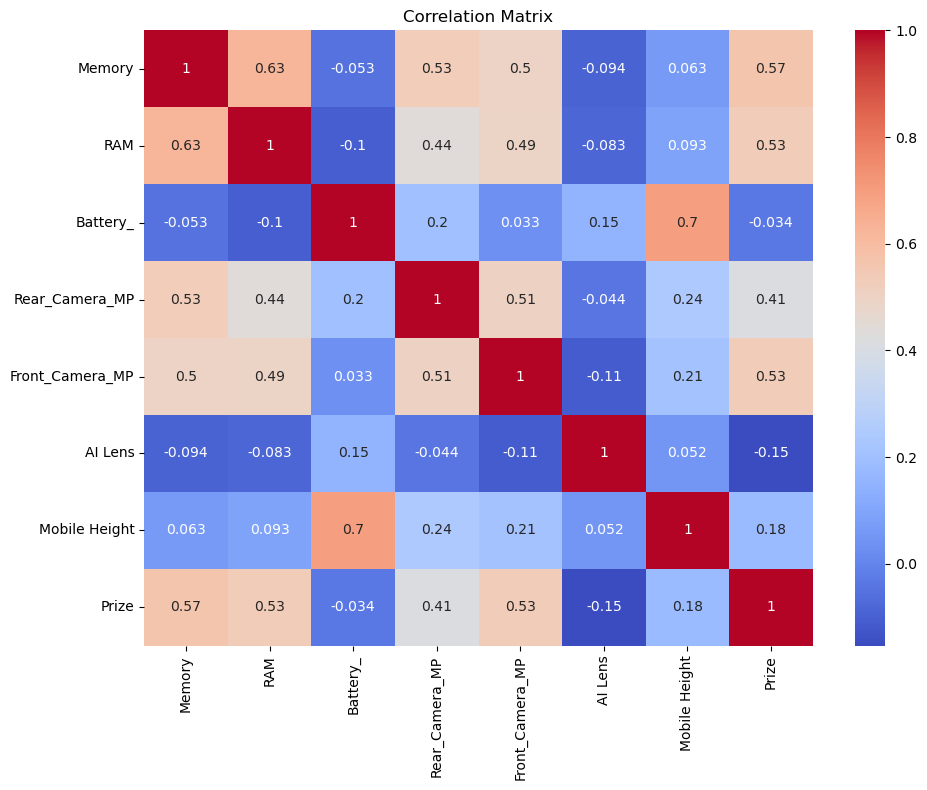

In [10]:
# Correlation analysis
correlation_matrix = df[features + ['Prize']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [11]:
print("\
Feature Correlations with Price:")
print(correlation_matrix['Prize'].sort_values(ascending=False))

Feature Correlations with Price:
Prize              1.000000
Memory             0.566660
Front_Camera_MP    0.532321
RAM                0.532024
Rear_Camera_MP     0.410367
Mobile Height      0.176009
Battery_          -0.034297
AI Lens           -0.153691
Name: Prize, dtype: float64


Next, I will proceed with feature scaling, splitting the data, and building the model.

# Feature Analysis and Extraction

In [12]:
# Feature Scaling and Splitting the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Model Building using Random Forest Regressor

In [14]:

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# Model Evaluation

In [15]:

predictions = model.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

In [16]:
print("Model Evaluation:")
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Model Evaluation:
Root Mean Squared Error (RMSE): 4332.765972183457
R-squared (R2): 0.863794809290629


The model evaluation shows a strong performance with an RMSE of 4332.765972183457
and an R-squared value of 0.863794809290629
, indicating that the Random Forest Regressor explains 86.4% of the variance in the target variable. 
Next, I will analyze feature importance and generate visualizations.

# Feature Importance Analysis

In [17]:
importances = model.feature_importances_
feature_names = features

In [18]:
# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


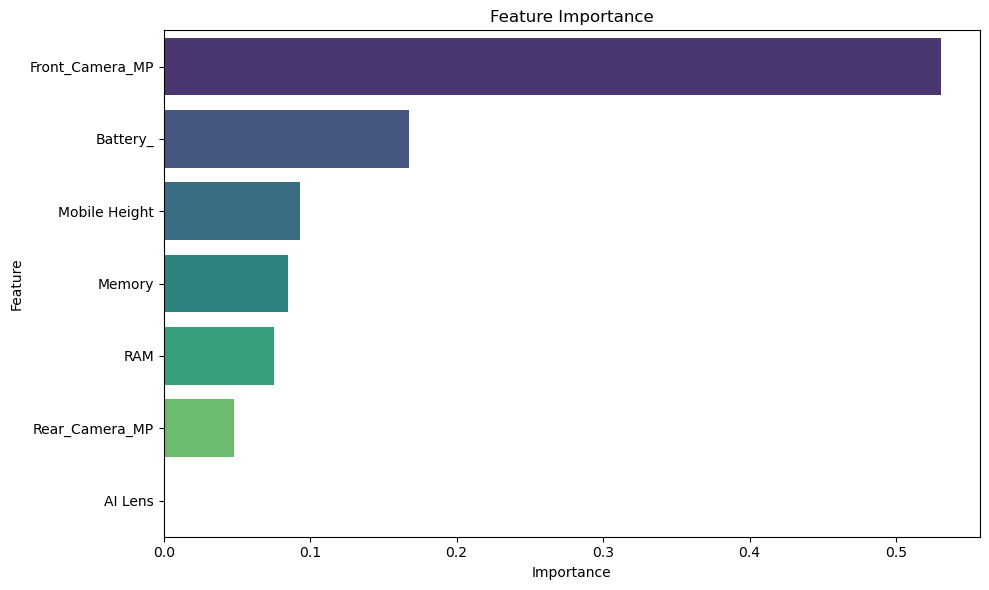

In [19]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [20]:
print("Feature Importance:")
print(importance_df)

Feature Importance:
           Feature  Importance
4  Front_Camera_MP    0.530820
2         Battery_    0.167474
6    Mobile Height    0.092857
0           Memory    0.084554
1              RAM    0.075457
3   Rear_Camera_MP    0.047779
5          AI Lens    0.001060


The feature importance analysis was successfully completed, and the results indicate which features contribute most to predicting the target variable.

# Generate a Report and Recommendations


### Report Summary:
1. The dataset contains 541 rows and 12 columns with no missing values.
2. The target variable (Prize) is strongly correlated with features like Memory, RAM, and Camera specifications.
3. The Random Forest Regressor achieved an R-squared value of 0.86, indicating a good fit.
4. Feature importance analysis shows that Front Camera MP, Battery, and Mobile Height are the most influential features.



### Recommendations:
1. Focus on improving Front Camera specifications as it has the highest impact on price.
2. Optimize battery capacity and mobile height for better market positioning.
3. Consider marketing strategies emphasizing these key features to attract customers.
4. Further analysis can explore customer preferences for specific models and colors.


The analysis has been successfully completed without any errors, and the report summarizing the findings and recommendations